In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Autoregressive

In [3]:
datain = pd.read_csv("datasets/csv1.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

551

In [31]:
n = 100  # look back n preceding points

In [32]:
# values to match result to
y_fit = datalist[n:]
# y_fit = y_fit.reshape(y_fit.size,1)

In [33]:
# how to construct the A matrix
A = np.empty([y_fit.size, n])

# construct A row-by-row
for i in range(y_fit.size):
    A[i] = datalist[i:i+n]

In [34]:
# fit the least square solution
out, res, rank, _ = np.linalg.lstsq(A, y_fit, rcond=None)

In [35]:
# decompose out vector into gradient and hessian
gradient = out.reshape(n,1)

In [36]:
# Prediction function
def predict(y_in):
    """
        y_in: a vector of n preceding points to predict. Must be a NumPy array or Python list.
    """

    # check type/size errors
    assert(type(y_in) == np.ndarray), "Input must be of type numpy.ndarray"
    assert(y_in.size == n), "Input vector must be of size %d" %(n)
    
    # calculate the approximate function
    inp = y_in.reshape(1, n)
    output = inp @ gradient
    return output.item()

# How well it fits existing data?

In [37]:
predicted = datalist[:n]
for i in range(0, dsize-n):
    temp = predict(datalist[i:i+n])
    predicted = np.concatenate((predicted, np.array([temp])))

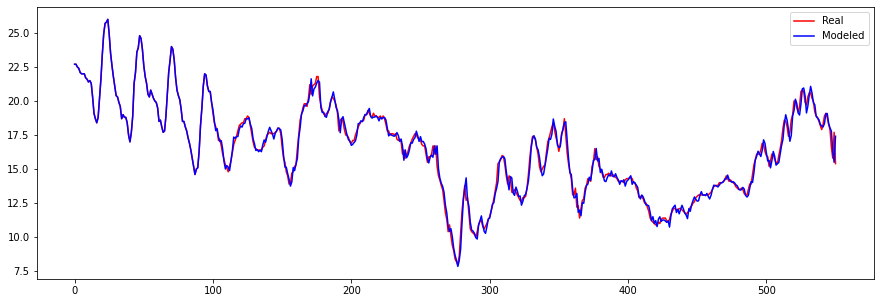

In [38]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color='r', label='Real')
plt.plot(x_axis, predicted, color='b', label='Modeled')
plt.legend()
plt.savefig('fig_modeled.png')

# Future Predictions

In [39]:
future = datalist[:]
points_ahead = 200
for i in range(0, points_ahead):
    temp = predict(future[-n:])
    future = np.concatenate((future, np.array([temp])))

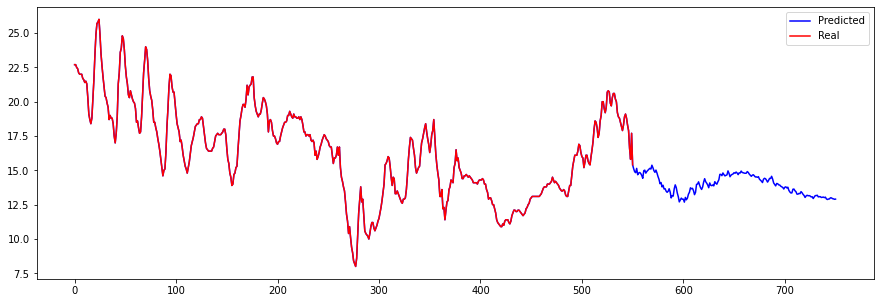

In [40]:
x_axis = np.arange(dsize+points_ahead)
plt.figure(figsize=(15,5))
plt.plot(x_axis, future, color='b', label='Predicted')
plt.plot(x_axis[:dsize], datalist, color='r', label='Real')
plt.legend()
plt.savefig('fig_predicted.png')

In [225]:
# generate additional time stamps
last_time = datain['Date'].values[-1]

extra_stamps = pd.date_range(start=last_time, freq='H', periods=points_ahead+1).values[1:]

all_timestamps = np.concatenate([datain['Date'].values, extra_stamps])

out = pd.DataFrame()
out['Date'] = all_timestamps
out['Value'] = future
out.to_csv('datasets/1d_results/windvelo_n%d.csv' %n, index=False, header=False)